<a href="https://colab.research.google.com/github/vtanoe08/Python_Vincent/blob/main/Clustering_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#activate R magic
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:
%%R
#https://kupdf.net/download/practical-guide-to-cluster-analysis-in-r-unsupervised-machine-learning_5a65e055e2b6f556501cc785_pdf
install.packages("cluster")
install.packages(c("cluster","factoextra"))
install.packages("devtools")
devetools::install_github("kassambara/factoextra")
library("cluster")
library("dplyr")
library("ggplot2")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/cluster_2.1.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 380366 bytes (371 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ


Error in loadNamespace(name) : there is no package called ‘devetools’
Calls: <Anonymous> ... loadNamespace -> withRestarts -> withOneRestart -> doWithOneRestart


In [ ]:
%%R
#load the data
data("USArrests")
head(USArrests,3)


        Murder Assault UrbanPop Rape
Alabama   13.2     236       58 21.2
Alaska    10.0     263       48 44.5
Arizona    8.1     294       80 31.0


In [ ]:
#data preparation
%%R
df<-USArrests
df<-na.omit(df)
names(df)

[1] "Murder"   "Assault"  "UrbanPop" "Rape"    


In [ ]:
#Standardize the data using scale to avoid arbitrary variable
%%R
df1=scale(df)
round(head(df1,3),2)
is.numeric(df)

[1] FALSE


In [ ]:
#Clustering Distance Measure chap 3
%%R
#Subset of the data
set.seed(123)
ss=sample(1:50,15) # take 15 random rows
df2=df[ss,] #Subset the 15 rows
df2.scaled=scale(df2)
nrow(df2.scaled)
ncol(df2.scaled)

[1] 4


In [ ]:
#Computing euclidean distance
%%R
dist.eucl=dist(df2.scaled, method="euclidean")
#reformat as a matrix
#subset the first 3 columns and rows and round the values
round(as.matrix(dist.eucl)[1:3,1:3],1)

           New Mexico Iowa Indiana
New Mexico        0.0  4.1     2.5
Iowa              4.1  0.0     1.8
Indiana           2.5  1.8     0.0


In [ ]:
#compute using the correlation based distance which are commonly used in gene expression data analysis
%%R
install.packages("factoextra")
library("factoextra")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘openxlsx’, ‘rio’, ‘car’, ‘rstatix’, ‘FactoMineR’, ‘ggpubr’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/openxlsx_4.2.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1275121 bytes (1.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

In [ ]:
%%R
dist.corr=get_dist(df2.scaled,method="pearson")
#display a subset
round(as.matrix(dist.corr)[1:3,1:3],1)

           New Mexico Iowa Indiana
New Mexico        0.0  1.7     2.0
Iowa              1.7  0.0     0.3
Indiana           2.0  0.3     0.0


In [ ]:
%%R
library("cluster")
#load data
data(flower)
print(head(flower,3))
print(str(flower))

  V1 V2 V3 V4 V5 V6  V7 V8
1  0  1  1  4  3 15  25 15
2  1  0  0  2  1  3 150 50
3  0  1  0  3  3  1 150 50
'data.frame':	18 obs. of  8 variables:
 $ V1: Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 1 2 2 ...
 $ V2: Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 1 2 2 ...
 $ V3: Factor w/ 2 levels "0","1": 2 1 1 2 1 1 1 2 1 1 ...
 $ V4: Factor w/ 5 levels "1","2","3","4",..: 4 2 3 4 5 4 4 2 3 5 ...
 $ V5: Ord.factor w/ 3 levels "1"<"2"<"3": 3 1 3 2 2 3 3 2 1 2 ...
 $ V6: Ord.factor w/ 18 levels "1"<"2"<"3"<"4"<..: 15 3 1 16 2 12 13 7 4 14 ...
 $ V7: num  25 150 150 125 20 50 40 100 25 100 ...
 $ V8: num  15 50 50 50 15 40 20 15 15 60 ...
NULL


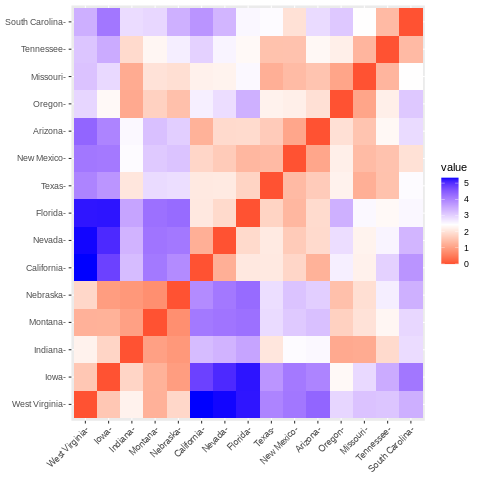

In [ ]:
#visualization
%%R
fviz_dist(dist.eucl)

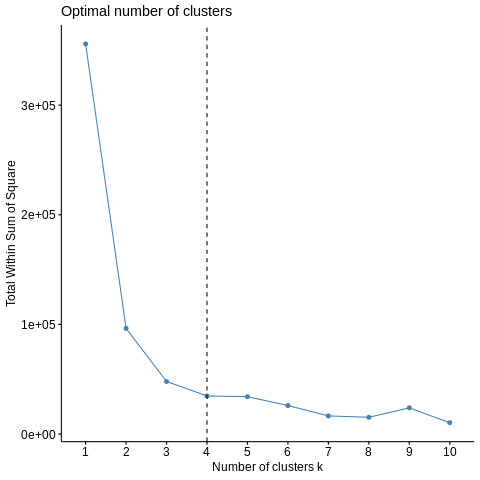

In [ ]:
#K-Means Clustering
%%R
fviz_nbclust(df,kmeans,method="wss")+
geom_vline(xintercept=4,linetype=2)

In [ ]:
#compute k-means with k=4
%%R
set.seed(123)
km.res=kmeans(df,4,nstart=25) #nstart=35 means trying 25 or 50 different random starting assignments in order to have more stable results
print(km.res)

K-means clustering with 4 clusters of sizes 14, 10, 10, 16

Cluster means:
     Murder  Assault UrbanPop     Rape
1  8.214286 173.2857 70.64286 22.84286
2  5.590000 112.4000 65.60000 17.27000
3  2.950000  62.7000 53.90000 11.51000
4 11.812500 272.5625 68.31250 28.37500

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             4              4              4              1              4 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             1              2              4              4              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              2              4              2              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              2              4              3              4 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             1            

In [ ]:
# compute the mean of each variables by clusters using the original data
%%R
aggregate(df,by=list(cluster=km.res$cluster),mean)

  cluster    Murder  Assault UrbanPop     Rape
1       1  8.214286 173.2857 70.64286 22.84286
2       2  5.590000 112.4000 65.60000 17.27000
3       3  2.950000  62.7000 53.90000 11.51000
4       4 11.812500 272.5625 68.31250 28.37500


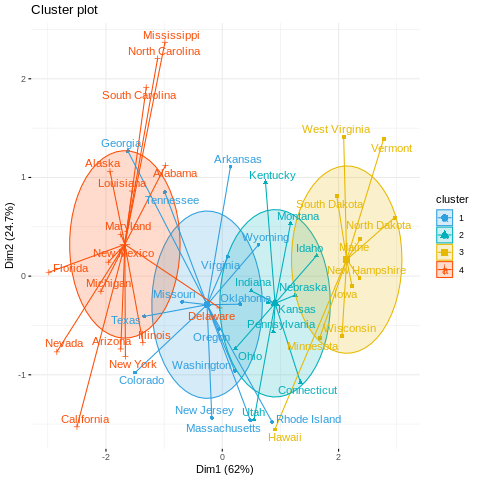

In [ ]:
%%R
fviz_cluster(km.res,data=df,
             palette=c("#2E9FDF","#00AFBB","#E7B800","#FC4E07"),
             ellipse.type="euclid",#concentration ellipse
             star.plot=TRUE,#Add segments from centroids to items
             repel=TRUE,#Avoid label overplottting (slow)
             ggtheme=theme_minimal())

In [ ]:
%%R
head(df,5)

           Murder Assault UrbanPop Rape
Alabama      13.2     236       58 21.2
Alaska       10.0     263       48 44.5
Arizona       8.1     294       80 31.0
Arkansas      8.8     190       50 19.5
California    9.0     276       91 40.6
